## Loan status classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the given dataset

In [2]:
df=pd.read_csv('Project_8_Naive_Bayes_Loan_Status.csv')
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


In [3]:
df.shape

(30000, 16)

## Describe the data

In [4]:
df.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,27992.000000,27494.000000,27130.000000,26805.000000,26494.000000,25980.000000,24751.000000,2.460400e+04,24032.000000,23592.000000,23297.000000,22827.000000
mean,10666.660700,14.648867,32.427900,33989.494570,33938.750418,32617.867011,30709.504160,29015.123424,28526.276559,2613.957537,2.922762e+03,2584.508988,2250.186122,2300.375885,2608.765760
std,9698.091793,189.496507,12.718991,61569.150299,60904.557498,58654.145088,54827.113904,51729.302253,51625.821980,12548.633278,1.849890e+04,12242.048527,11056.957868,11071.445005,13358.162766
min,1.000000,1.000000,3.000000,-154973.000000,-69777.000000,-157264.000000,-81334.000000,-81334.000000,-94625.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000
25%,1850.500000,4.000000,26.000000,1574.000000,1556.000000,1534.000000,1433.000000,1327.000000,1261.000000,15.000000,1.400000e+01,8.000000,6.000000,5.000000,5.000000
50%,7483.500000,9.000000,33.000000,8551.500000,8697.500000,8889.500000,8671.000000,8131.500000,7819.000000,166.000000,1.640000e+02,119.000000,75.000000,75.000000,78.000000
75%,18746.250000,21.000000,41.000000,38251.750000,38605.500000,36534.250000,32855.000000,29680.500000,29459.750000,1667.000000,1.662000e+03,1381.250000,983.000000,982.000000,1133.000000
max,29999.000000,32768.000000,79.000000,964511.000000,983931.000000,693131.000000,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,417588.000000,528897.000000,426529.000000,528666.000000


## Basic data information 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  int64  
 1   LIMIT_BAL       30000 non-null  float64
 2   AGE             30000 non-null  int64  
 3   BILL_AMT1       27992 non-null  float64
 4   BILL_AMT2       27494 non-null  float64
 5   BILL_AMT3       27130 non-null  float64
 6   BILL_AMT4       26805 non-null  float64
 7   BILL_AMT5       26494 non-null  float64
 8   BILL_AMT6       25980 non-null  float64
 9   PAY_AMT1        24751 non-null  float64
 10  PAY_AMT2        24604 non-null  float64
 11  PAY_AMT3        24032 non-null  float64
 12  PAY_AMT4        23592 non-null  float64
 13  PAY_AMT5        23297 non-null  float64
 14  PAY_AMT6        22827 non-null  float64
 15  Default Status  30000 non-null  object 
dtypes: float64(13), int64(2), object(1)
memory usage: 3.7+ MB


## check the count of null values in dataset column

In [6]:
df.isna().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

In [7]:
df.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

## Fill Null values with mean

In [8]:
for i in df.columns:
    if df[i].isna().sum()>0:
        df[i]=df[i].fillna(df[i].mean())
        
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.0,2584.508988,2250.186122,2300.375885,2608.76576,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.0,1.000000,1.000000,2300.375885,2.00000,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.0,1.000000,1.000000,1.000000,5.00000,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.0,12.000000,11.000000,169.000000,1.00000,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.0,1.000000,9.000000,689.000000,679.00000,Not Default


In [9]:
df.isna().sum()

ID                0
LIMIT_BAL         0
AGE               0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Default Status    0
dtype: int64

## Check unique values in AGE column

In [10]:
df['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41,  3, 49, 39,  4, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55,  6,  5, 75, 61, 73, 59, 21, 67, 66, 62,  7, 72, 64, 65,
       71, 69, 68, 79, 74], dtype=int64)

## Check unique values in Default Status column

In [11]:
df['Default Status'].unique()

array(['Default', 'Not Default'], dtype=object)

## box plot for LIMIT_BAL

<AxesSubplot:xlabel='LIMIT_BAL'>

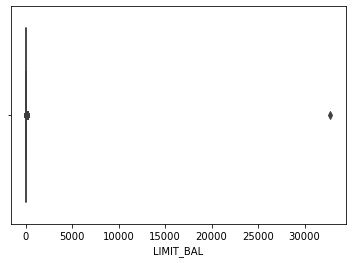

In [12]:
sns.boxplot('LIMIT_BAL', data=df)

## box plot for AGE

<AxesSubplot:xlabel='AGE'>

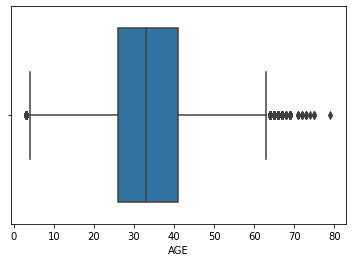

In [13]:
sns.boxplot('AGE', data=df)

## In Default Status column replace categorical values with numerical values by manually

In [14]:
df['Default Status']=df['Default Status'].replace({'Default':0,'Not Default':1})

In [15]:
df.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,30709.50416,29015.123424,28526.276559,2613.957537,689.0,2584.508988,2250.186122,2300.375885,2608.76576,0
1,2,12.0,26,2682.0,1725.0,2682.0,3272.00000,3455.000000,3261.000000,2613.957537,1.0,1.000000,1.000000,2300.375885,2.00000,0
2,3,9.0,34,29239.0,1427.0,13559.0,14331.00000,14948.000000,15549.000000,1518.000000,15.0,1.000000,1.000000,1.000000,5.00000,1
3,4,5.0,37,4699.0,48233.0,49291.0,28314.00000,28959.000000,29547.000000,2.000000,219.0,12.000000,11.000000,169.000000,1.00000,1
4,5,5.0,57,8617.0,567.0,35835.0,294.00000,19146.000000,19131.000000,2.000000,36681.0,1.000000,9.000000,689.000000,679.00000,1


## Create a features and target

In [16]:
x=df.drop(['Default Status'],axis=1)

In [17]:
y=df['Default Status']

## Split data into training and testing

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)

## Model - Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
model=GaussianNB()

In [22]:
model.fit(x_train,y_train)

GaussianNB()

In [23]:
y_pre=model.predict(x_test)

In [24]:
model.score(x_test,y_test)

0.7626666666666667

In [25]:
model.score(x_train,y_train)

0.7650416666666666

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

<AxesSubplot:>

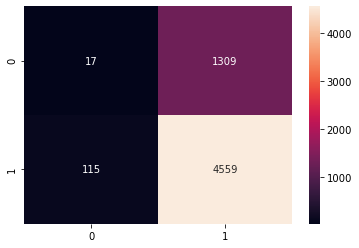

In [27]:
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True,fmt='d')

In [28]:
print(classification_report(y_pre,y_test))

              precision    recall  f1-score   support

           0       0.01      0.13      0.02       132
           1       0.98      0.78      0.86      5868

    accuracy                           0.76      6000
   macro avg       0.49      0.45      0.44      6000
weighted avg       0.95      0.76      0.85      6000



## Applying All Model

In [33]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [35]:
models={'LogisticRegression':LogisticRegression(),
        'SGDClassifier':SGDClassifier(),
        'DecisionTree':DecisionTreeClassifier(),
        'RandomForest':RandomForestClassifier(),
        'GradientBoosting':GradientBoostingClassifier(),
        'KNN':KNeighborsClassifier(),
        'SVM':SVC(),
        'AdaBoost':AdaBoostClassifier(),
        'Naive Bayes':GaussianNB(),
        'XGB':XGBClassifier()
       }

In [36]:
for name, model in models.items():
    model1=model.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    print(f"{name} confuion matrix: \n {confusion_matrix(y_test,y_pred)}") 
    print(f'{name} accuracy score: {accuracy_score(y_test, y_pred)}')
    print(f'{name} precision score: {precision_score(y_test,y_pred)}')
    print(f'{name} recall score: {recall_score(y_test,y_pred)}')
    print(f'{name} classification report :\n {classification_report(y_test,y_pred)}\n\n')

LogisticRegression confuion matrix: 
 [[   0 1326]
 [   0 4674]]
LogisticRegression accuracy score: 0.779
LogisticRegression precision score: 0.779
LogisticRegression recall score: 1.0
LogisticRegression classification report :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1326
           1       0.78      1.00      0.88      4674

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



SGDClassifier confuion matrix: 
 [[ 235 1091]
 [ 784 3890]]
SGDClassifier accuracy score: 0.6875
SGDClassifier precision score: 0.7809676771732584
SGDClassifier recall score: 0.8322635857937527
SGDClassifier classification report :
               precision    recall  f1-score   support

           0       0.23      0.18      0.20      1326
           1       0.78      0.83      0.81      4674

    accuracy                           0.69  